# Lab Work - Purdue 512 - Applied Regression Analysis

![](https://engineering.purdue.edu/Wraps/ECO/wrap7/images/logo.png)


Here is a set of lab work from minzhang's 2015 [Purdue - 512 Applied Regression](http://www.stat.purdue.edu/~minzhang/512-Spring2015/)


In [7]:
import pandas as pd
import numpy as np

# import plotting libraries

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [77]:
def ols_plot(x, x_name,y, y_name):
    # https://nbviewer.jupyter.org/github/mscaudill/IntroStatLearn/blob/master/notebooks/Ch3_Linear_Regression/Lab_Linear_Regression.ipynb
    # create a figure to plot our data and OLS estimate
    fig, ax = plt.subplots(figsize=(8,6))

    ax.scatter(x.values, y.values, facecolors='none',
              edgecolors='b', label='data')
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)

    # call scipy linregress returning fit coefficients and simple statistics
    beta1, beta0, r_value, p_value, stderr = stats.linregress(x.values, y.values)

    # add the estimation to the data plot
    ax.plot(x.values, beta0 + beta1 * x.values,
           color = 'r', label = 'OLS')
    ax.legend(loc='best')

    # print the regression estimates and returned from scipy
    print('beta = [', round(beta0,3), ',', round(beta1,3),']')
    print('R={0:.3f}, \np_value={1:.3f}, \nstderr={2:.3f}'.format(r_value, p_value, stderr))

def confident_bands_plot(model, x, y, alpha=0.05):
    # https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/
    from statsmodels.sandbox.regression.predstd import wls_prediction_std

    # predictor variable (x) and dependent variable (y)

    # Retrieve our confidence interval values
    # _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
    # since wls_prediction_std(housing_model) returns 3 values
    _, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(model, alpha=alpha)

    fig, ax = plt.subplots(figsize=(10,7))

    # plot the dots
    # 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
    ax.plot(x, y, 'o', label="data")

    # plot the trend line
    # g-- and r-- specify the color to use
    ax.plot(x, model.fittedvalues, 'g--.', label="OLS")

    # plot upper and lower ci values
    ax.plot(x, confidence_interval_upper, 'r--')
    ax.plot(x, confidence_interval_lower, 'r--')

    # plot legend
    ax.legend(loc='best');

## HW1 Problem 3

Grade point average. The director of admissions of a small college selected 120 students at
random from the new freshman class in a study to determine whether a student's grade point
average (OPA) at the end of the freshman year (Y) can be predicted from the ACT test score (X).
The results of the study follow. Assume that first-order regression model (1.1) is appropriate. 

In [102]:
gpa = pd.read_table("http://www.stat.purdue.edu/~minzhang/512-Spring2015/Datasets_files/CH01PR19.DAT",
                     header=None, names=['GPA','ACT_test_scores'],delim_whitespace=True)
gpa.head()

,GPA,ACT_test_scores
0,3.897,21
1,3.885,14
2,3.778,28
3,2.540,22
4,3.028,21


beta = [ 2.114 , 0.039 ]
R=0.269, 
p_value=0.003, 
stderr=0.013


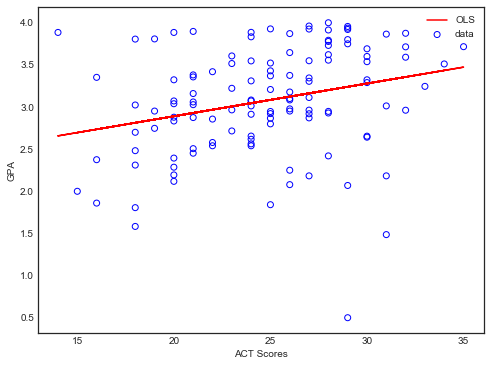

In [103]:
ols_plot(gpa.ACT_test_scores, 'ACT Scores', gpa.GPA, 'GPA')

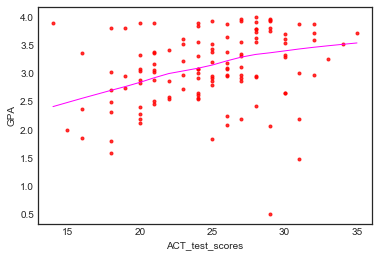

In [104]:
x =gpa.ACT_test_scores
y = gpa.GPA

sns.regplot(x, y, lowess=True, line_kws={"color":"magenta", "linewidth":1}, 
            scatter_kws={'color':'r', 's':9})

>Run a linear regression to predict GPA based on the entrance exam. Give the complete
ANOVA table for this regression.

In [105]:
model = smf.ols(formula='GPA~ACT_test_scores', data = gpa).fit()
print("estimated slope coefficient: ", model.params.ACT_test_scores)
print("SSR: ", model.mse_model)
print(sm.stats.anova_lm(model))

estimated slope coefficient:  0.038827126905259586
SSR:  3.5878458993130025
                    df     sum_sq   mean_sq         F    PR(>F)
ACT_test_scores    1.0   3.587846  3.587846  9.240243  0.002917
Residual         118.0  45.817608  0.388285       NaN       NaN


> Give a point estimate and a 94% confidence interval for the slope and intercept and
interpret each of these in words. (Point estimate is another word for parameter estimate.)

In [106]:
print(model.summary(alpha = 0.06))

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     9.240
Date:                Mon, 18 Feb 2019   Prob (F-statistic):            0.00292
Time:                        09:24:07   Log-Likelihood:                -112.50
No. Observations:                 120   AIC:                             229.0
Df Residuals:                     118   BIC:                             234.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|       [0.03       0.97]
-----------------------------------------------------------------------------------
Intercept           2.1140      0.321     

#### Analysis:
The regression equation for this problem is:
__GPA = 2.11 + 0.039 ACT_test_scores__


- __R-squared = 7%__ which indicates only 7% of the __varation in `GPA scores` is reducted by  taking into account ACT scores__
- __Slope__  = 0.0388 which means that `GPA` score rate increases 0.0388 units, on average, for each one unit incease in `ACT Test Scores`
- __Intercept__ = 2.11 which mean sthat if there were a student had a zero on the ACT test score the GPA would be 2.11. Since there were no students that had 0 on the ACT this intercept of the intercept is not practically meaniningful.

__Confidence Interval__ We can be 94% confident that the GPA scores is between 0.015 and 0.063. that is, ew can be 94% confident that for every additional one unit increase in ACT Test score, the mean GPA score rate increase between 0.015 and 0.063.

### ...HW4 Probm 2-5

> 2. Describe the distribution of the explanatory variable. Show the plots and output that were
helpful in learning about this variable.

we can see from the above regression plot that as `GPA` score rate increases the `ACT Test Scores` also increase. 

>3. Run the linear regression to predict GPA from the entrance test score, and obtain the residuals
(do not include a list of the residuals in your solution).

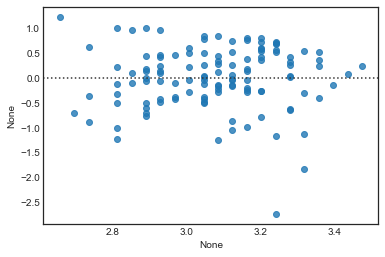

In [107]:
sns.residplot(x = model.fittedvalues, y = model.resid)

Above is the residual vs fitts plot form the GPA model. WE can see that there is a random pattern of observations around the 0 line. The observations appear to be spread equally this meeting the normal and varirance assumptions. There doesnot appear to be an outlier. 

> (d) Examine the distribution of the residuals by getting a histogram and a normal probability plot of the residuals by using the histogram and qqplot statements in proc
univariate. What do you conclude?


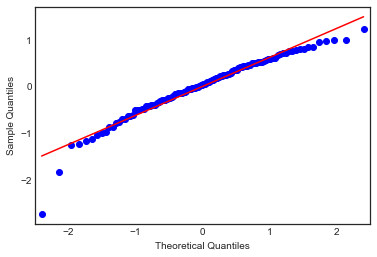

In [108]:
sm.qqplot(model.resid, line='r');

Using the QQ plot, we can see that the does appear to be an outlier however, the majority of the observations follow the linear line, therefore normality assumption is met. 

__The residuals appear reasonably normal if somewhat asymmetric, since the histogram appears fairly normal, and the qqplot is fairly linear. There is some suggestion of a concave down shape to the qq-plot, but it is
not too bad__

> 4. Change the data set by changing the value of the GPA for the last observation from 2.948
to 29.48 (e.g., a typo). Y

In [111]:
gpa.GPA[119] = 29.48

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


beta = [ 1.432 , 0.075 ]
R=0.135, 
p_value=0.141, 
stderr=0.051
                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.192
Date:                Mon, 18 Feb 2019   Prob (F-statistic):              0.141
Time:                        09:33:04   Log-Likelihood:                -278.38
No. Observations:                 120   AIC:                             560.8
Df Residuals:                     118   BIC:                             566.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|       [0.03       0.97]
--------------------------------------------------------------

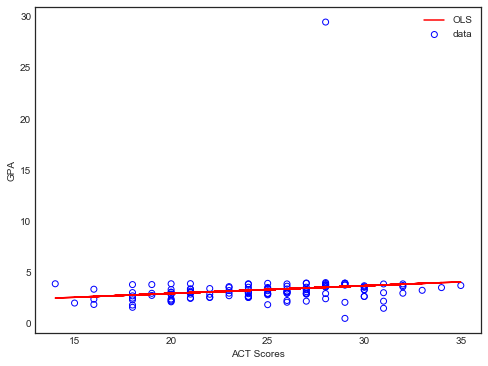

In [115]:
ols_plot(gpa.ACT_test_scores, 'ACT Scores', gpa.GPA, 'GPA');
model = smf.ols(formula='GPA~ACT_test_scores', data = gpa).fit()
print(model.summary(alpha = 0.06))

Clearly there is an outlier affecting the entire regression line with __High Leverage and High Influence__

Additionally the variables no long have a relationship as 0 is a value in the confidence interval when performing the t-test.

__The outlier has a huge impact on these results. The slope becomes nearly double its original value and is no longer significantly different from zero. The changes in R2 and s2 are also very extreme. The outlier greatly inflates the estimated variance and makes the R2 almost zero.__

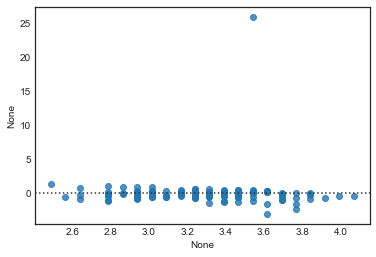

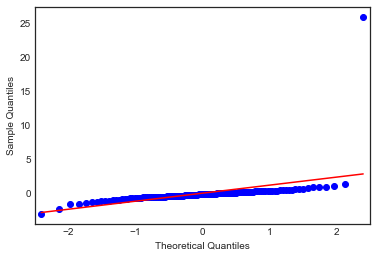

In [117]:
sns.residplot(x = model.fittedvalues, y = model.resid);
sm.qqplot(model.resid, line='r');

- The __outlier__ is quite noticeable on the residual plots as a point far away from all the others
- The __qqplot__ shows that the data do not fit on the straight line with the estimated mean and standard deviation, and the outlier again appears quite separate from all the others

__All together, these plots clearly show there is one outlying point which should
be investigated.__

## HW1 Problem 4
>Plastic hardness. Refer to Problems 1.3 and 1.14. Sixteen batches of the plastic were made,
and from each batch one test item was molded. Each test item was randomly assigned to one of
the four predetermined time levels, and the hardness was measured after the assigned elapsed
time. The results are shown below; X is the elapsed time in hours? and Y is hardness in Brinell
units. Assume that first-order regression model (1.1) is appropria'te. 

In [64]:
plastic = pd.read_table("http://www.stat.purdue.edu/~minzhang/512_Spring2014/Datasets_files/CH01PR22.DAT",
                       header=None, names=['hardness','hours'],delim_whitespace=True)
plastic.head()

,hardness,hours
0,199.0,16.0
1,205.0,16.0
2,196.0,16.0
3,200.0,16.0
4,218.0,24.0


beta = [ 168.6 , 2.034 ]
R=0.986, 
p_value=0.000, 
stderr=0.090


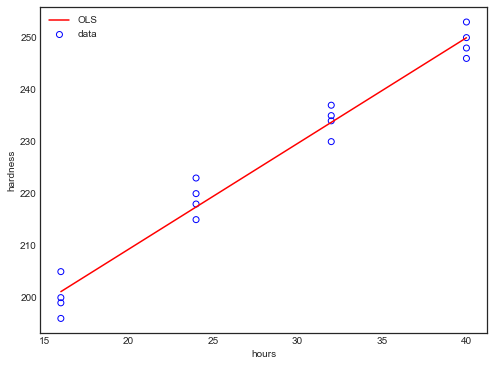

In [65]:
ols_plot(plastic.hours, 'hours', plastic.hardness, 'hardness')

This appears to be a (positive) linear relationship as observations are on the linear line. and the pvalue from the t-test for Beta = 0 is <0.001

> Run the linear regression to predict hardness from time. Give
i. the linear model used in this problem
ii. the estimated regression equation.

In [66]:
model = smf.ols(formula='hardness~hours', data = plastic).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     506.5
Date:                Sun, 17 Feb 2019   Prob (F-statistic):           2.16e-12
Time:                        07:09:18   Log-Likelihood:                -40.414
No. Observations:                  16   AIC:                             84.83
Df Residuals:                      14   BIC:                             86.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    168.6000      2.657     63.454      0.0

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


Regression equation: __y-hat(hardness | hours) = 168.6 + 2.0344 hours__

_To answer the question Is there a relationship between x and y?_
- The null hypothesis is H0 : β1 = 0, and the alternative is HA : β1 6= 0.
- The observed test statistics is t = 22.51

Since the estimated slope of the line, b1  is 2.0344 and not 0 and there is a p-value <0.001, we can __reject the null hypothesis__ and conlcude there is sufficent evidence there is  __relationship between hours and hardness for plastic__ in the sample of 16 (14 degreees of freedom). We are 95% confident that for ever additional hour increase increment, the mean hardness rate increases between 1.84 and 2.228.

We could also say: __We reject H0 and conclude that the slope is non-zero. So there is a significant linear relationship between hardness and time.__

__R-squared = 97%__ this mean that 97% of the variation in plastic hardnes is due to or is explained by hours




### ... Plastic Continuation HW2 Problem 5-10
>Plot the data using proc gplot. Include a smoothed function on the plot by using the i =
smnn option on the symbol1 statement, where nn is a number between 1 and 99. Please use
the number 70. Is the relationship approximately linear?

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


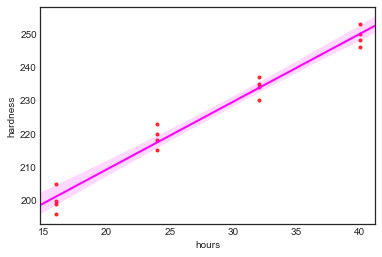

In [81]:
sns.regplot(x = 'hours', y= 'hardness', data = plastic, lowess=False, 
            line_kws={"color":"magenta", "linewidth":2}, 
            scatter_kws={'color':'r', 's':9})



Yes, the relationship is reasonably linear. There is some slight curvature at lower values of time but nothing substantial.


>6. Plot the 94% bounds (confidence band) for the mean (use i=rlclm on the symbol1 statement).

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


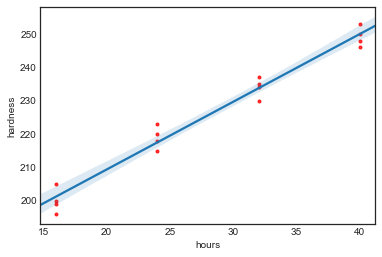

In [79]:
sns.regplot(x=plastic.hours, y=plastic.hardness, ci=94, scatter_kws={'color':'r', 's':9})

>7. Plot the 94% bounds for individual observations (using i=rlcli).

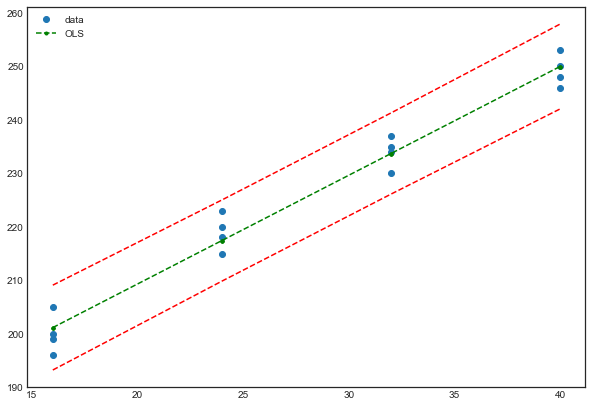

In [78]:
confident_bands_plot(model=model, x=plastic.hours, y=plastic.hardness, alpha=0.04)

>8. Give an estimate of the mean hardness that you would expect after 36 and 43 hours; and a
94% confidence interval for each estimate. Which confidence interval is wider and why is it
wider?


In [87]:
#Statsmodel - prediction for new observation

model.get_prediction(pd.DataFrame({'hours':[36, 43]})).summary_frame(alpha=0.06)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,241.837500,1.084726,239.617968,244.057032,234.857826,248.817174
1,256.078125,1.578660,252.847920,259.308330,248.714447,263.441803


__Based on the output, the predicted value of `hardness` at 36 hours is 241.84 and at 94% confidence interval for the mean hardness is between 239.62 and 244.06.__

__The output also give that at 43 hours, the _predicted hardness_ is 256.08 and at 94% ci for the mean hardness is between 252.85 and 259.31.__

__The confidence interval for X = 43 is wider because the value 43 is farther away from the sample mean x-bar than 36. As a result the standard error for the prediciton is larger.__


> 9. Give a prediction for the hardness that you would expect for an individual piece of plastic
after 43 hours; give a 94% prediction interval for this quantity

In [91]:
model.get_prediction(pd.DataFrame({'hours':[43]})).summary_frame(alpha=0.06)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,256.078125,1.57866,252.84792,259.30833,248.714447,263.441803


__The _predicted hardness_ is 256.08 after 43 hours; we are 94% confident that the hardness value will fall in the interval 248.71 to 263.44__

---
## HW 3 - Problem 1
>(a) Generate a scatterplot of V vs C. Comment on the shape.


In [93]:
reaction = pd.read_table("./data/reaction.txt",delim_whitespace=True)
reaction.head()

,Concentration,Rate
0,0.02,76
1,0.02,47
2,0.06,97
3,0.06,107
4,0.11,123


beta = [ 103.488 , 110.421 ]
R=0.831, 
p_value=0.001, 
stderr=23.371


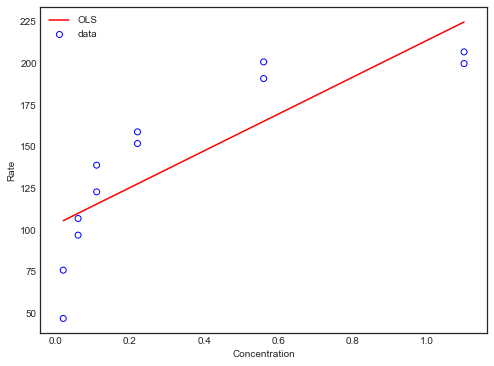

In [118]:
ols_plot(reaction.Concentration, 'Concentration', reaction.Rate, 'Rate')

Appears to be curved. not linear. needs transformations.__The relationship between V and C does not apper to be linear. V increases rapidly for small values of C but tends to level off as C approaches 1.__

>(b) Define new variables for 1
V
and 1
C
in SAS, and generate a scatterplot of the new variables.
Does the fit appear linear? Do any assumptions appear to be violated? The new variables
can be defined as follows (if the dataset original contains the raw data):


In [97]:
reaction['vinv'] = 1/reaction.Rate
reaction['cinv'] = 1/reaction.Concentration

beta = [ -15.681 , 3461.255 ]
R=0.925, 
p_value=0.000, 
stderr=449.485


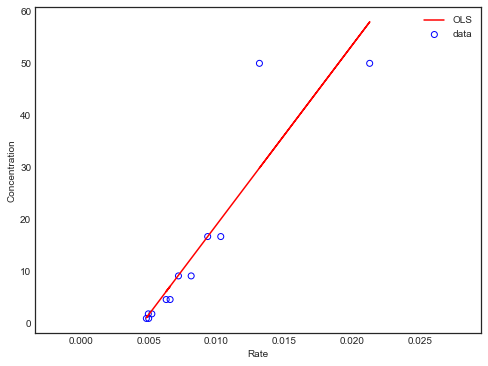

In [98]:
ols_plot(reaction.vinv, 'Rate', reaction.cinv, 'Concentration')

Linearity has a better fit, howevr there can be some concern abour __equal variance vilation__ since the observations with 1/C appear must larger residuals than do the over observations. 

> How is the distribution of 1
C
different from the distribution of C? Are there any points
that may be more influential in determining the fit?



the distribution is definitely different, there fit is better wth the 1/x transformation. I would say observations > 0.013 rate have __some leverage and some influence__ but not anything extreme. 

>(d) Determine the least squares regression line for 1
V
vs 1
C
. Save the residuals and predicted
values. Does the residual plot suggest any problems?


                            OLS Regression Results                            
Dep. Variable:                   vinv   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     59.30
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           1.64e-05
Time:                        09:39:19   Log-Likelihood:                 59.306
No. Observations:                  12   AIC:                            -114.6
Df Residuals:                      10   BIC:                            -113.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0051      0.001      7.255      0.0

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


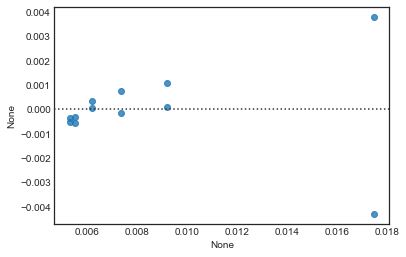

In [119]:
reaction_model = smf.ols(formula='vinv~cinv', data = reaction).fit()
print(reaction_model.summary())
sns.residplot(x = reaction_model.fittedvalues, y = reaction_model.resid)

There is definitely violation in equal variance. some transformaion needs to occur.

Least Squares equation = _y = 0.0051 + 0.0002 cinv_

>(e) Convert this regression line back into the original nonlinear model and plot the predicted
curve on a scatterplot of V vs C. Comment on the fit. To generate the predicted curve,
simply take the predicted values from the regression model and “re-invert” them. For
example, suppose results is the data set containing the residuals and predicted values
(variable pred)

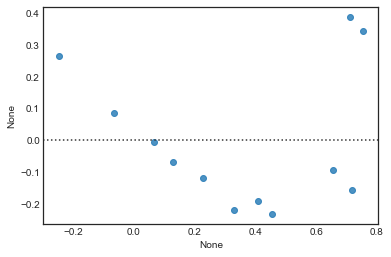

In [122]:
reaction_model = smf.ols(formula='Concentration~Rate', data = reaction).fit()
sns.residplot(x = reaction_model.fittedvalues, y = reaction_model.resid)

using the original residual fits plot confirms our initial theory that data was non-linear as the above regression plot show a non-random patten around the 0 line. 

---
## HW 4 Problem 5 - Assumption and Diagonstics

> For the following 5 problems, consider the data given in the file CH06PR18.DAT,
which describes a data set (n = 24) used to evaluate the relation between intermediate and senior level annual salaries of bachelor’s and master’s level mathematicians (Y , in thousand dollars) and an index of work quality (X1), number of
years of experience (X2), and an index of publication success (X3).


In [124]:
school = pd.read_table("http://www.stat.purdue.edu/~minzhang/512_Spring2014/Datasets_files/CH06PR18.DAT",
                      header=None, names=['y','x1','x2','x3'],delim_whitespace=True)
school.head()

,y,x1,x2,x3
0,33.2,3.5,9.0,6.1
1,40.3,5.3,20.0,6.4
2,38.7,5.1,18.0,7.4
3,46.8,5.8,33.0,6.7
4,41.4,4.2,31.0,7.5


>3. Run the multiple linear regression with quality, experience, and publications as the explanatory variables and salary as the response variable. Summarize the regression results by giving
the fitted regression equation, the value of R2
, and the results of the significance test for the
null hypothesis that the three regression coefficients for the explanatory variables are all zero
(give null and alternative hypotheses, test statistic with degrees of freedom, p-value, and brief
conclusion in words).

> 4. Give 94% confidence intervals (do not use a Bonferroni correction) for regression coefficients of quality, experience, and publications based on the multiple regression. Describe the results of the hypothesis tests for the individual regression coefficients (give null and alternative hypotheses, test statistic with degrees of freedom, p-value, and a brief conclusion in words). What is the relationship between these results and the confidence intervals?

> 5. Plot the residuals versus the predicted salary and each of the explanatory variables (i.e., 4
residual plots). Are there any unusual patterns?


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     68.12
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           1.12e-10
Time:                        10:02:00   Log-Likelihood:                -45.335
No. Observations:                  24   AIC:                             98.67
Df Residuals:                      20   BIC:                             103.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|       [0.03       0.97]
------------------------------------------------------------------------------
Intercept     17.8469      2.002      8.915      0.0

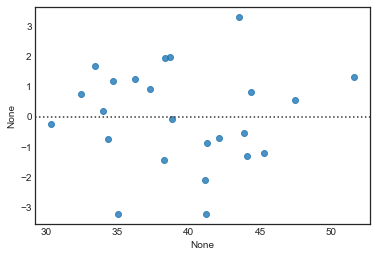

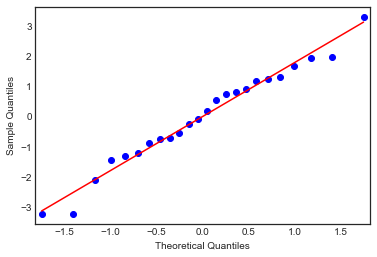

In [127]:
school_model = smf.ols(formula='y ~ x1 + x2 + x3', data = school).fit()
print(school_model.summary(alpha = 0.06))
sns.residplot(x = school_model.fittedvalues, y = school_model.resid);
sm.qqplot(school_model.resid, line='r');

__Fitted Regression Equations:__ y = 17.85 + 1 x1 + 0.32 x2 + 1.29 x3

- __R-squared = 91%__ this mean that 91% of the variance can be descibed by the model using x1, x2 and x3 variables. 
- __Significance Test__ - with all explainatory variables p-value < 0.001, we can __reject the null hypothesis in favor for the alternative hyptoehsis HA: betas do not equal 0__ with sufficent evidence to conclude that  __at least one of the explanatory variables has a significant linear relationship with salary (y).__   
    - H0 : β1 = β2 = β3 = 0 (all regression coefficients are zero) 
    - HA : at least one regression coefficient is nonzero


- __Confidence Interval__ - The 94% confidence intervals are [0.44, 1.76], [0.247, 0.395], and [0.69, 1.884] for the coefficnets on x1, x2, and x3, respectively. For all of the coeffiences, __we reject the null hypothesis__ and conclude the explainatory variables __has a significant linear relationship with salary (y), that each of these null hyptohesises was rejected is ocnsistent with the finding that none of the confidence internvals contain 0.__ 


- __Residual vs Predicted__ - There do not appear to be any obvious deviations from a random scatter of points. The assumptions of linearity and constant variance do not seem to be violated in any obvious way.


- __QQ Plot__ - __The residuals appear to be fairly normal.__ normality assumption met as observations about the linear line, however there is some curvature in the s shape, however, nothing significant. 

> 7. Predict the salary for a mathematician with quality index equal to 5.6, 12 years of experience,
and publication index equal to 6.2 . Provide a 94% prediction interval with your prediction.

In [129]:
school_model.get_prediction(pd.DataFrame({'x1':[5.6],
                                       'x2':[12],
                                       'x3':[6.2]})).summary_frame(alpha=0.06)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,35.874131,0.637902,34.602338,37.145923,32.155406,39.592856


__The model predicts a salary of 358741__, with a 94% interval of 32.15 and 39.59

---
## HW 5 - Problem 1 - Extra Sum of Squares

> 1. In this exercise you will illustrate some of the ideas described in Chapter 7 of the text related
to the extra sums of squares.
(c) Compare the test statistic and p-value from the test statement with the individual t-test
for the coefficient of the SAT variable in the full model. Explain the relationship.


In [179]:
school = pd.read_table("http://www.stat.purdue.edu/~minzhang/512_Spring2014/Datasets_files/csdata.dat",
                      header=None, names=['id','gpa','HSM','HSS', 'HSE', 'SATM', 'SATV', 'Gender'],
                       delim_whitespace=True)
school.head()

,id,gpa,HSM,HSS,HSE,SATM,SATV,Gender
0,1,3.32,10,10,10,670,600,1
1,2,2.26,6,8,5,700,640,1
2,3,2.35,8,6,8,640,530,1
3,4,2.08,9,10,7,670,600,1
4,5,3.38,8,9,8,540,580,1


>(a) Create a new variable called SAT which equals SATM + SATV and run the following two
regressions:
i. predict GPA using HSM, HSS, and HSE;
ii. predict GPA using SAT, HSM, HSS, and HSE. Calculate the extra sum of squares for the comparison of these two analyses. Use it to
construct the F-statistic – in other words, the general linear test statistic – for testing
the null hypothesis that the coefficient of the SAT variable is zero in the model with all
four predictors. What are the degrees of freedom for this test statistic?


In [183]:
school['SAT'] = school.SATM + school.SATV
model1 = smf.ols(formula='gpa~HSM + HSS + HSE', data = school).fit()
print("SSR: ", model1.mse_model)
print(sm.stats.anova_lm(model1))

SSR:  9.237443774851078
             df      sum_sq    mean_sq          F        PR(>F)
HSM         1.0   25.809894  25.809894  52.697471  6.621186e-12
HSS         1.0    1.237079   1.237079   2.525812  1.134332e-01
HSE         1.0    0.665359   0.665359   1.358499  2.450599e-01
Residual  220.0  107.750458   0.489775        NaN           NaN


In [184]:
model2 = smf.ols(formula='gpa~SAT + HSM + HSS + HSE', data = school).fit()
print("SSR: ", model2.mse_model)
print(sm.stats.anova_lm(model2))

SSR:  6.971865745294519
             df      sum_sq    mean_sq          F        PR(>F)
SAT         1.0    6.041708   6.041708  12.299605  5.495738e-04
HSM         1.0   20.039038  20.039038  40.795128  9.995157e-10
HSS         1.0    1.142117   1.142117   2.325102  1.287447e-01
HSE         1.0    0.664601   0.664601   1.352983  2.460232e-01
Residual  219.0  107.575326   0.491212        NaN           NaN


Calculating __General Linear test statistics__ consturction of f-statistic for ___EXTRA SUM OF SQUARES___

SSM(sat|hsm, hss, hse) = SSE(hsm, hss, hse) − SSE(sat, hsm, hss, hse)


In [188]:
print("SSM(sat|hsm, hss, hse): ", round(model1.ssr - model2.ssr, 3))

SSM(sat|hsm, hss, hse):  0.175


or

SSM(sat|hsm, hss, hse) = SSM(sat, hsm, hss, hse) − SSM(hsm, hss, hse)

In [191]:
print("SSM(sat|hsm, hss, hse): ", round(model2.ess - model1.ess, 3))

SSM(sat|hsm, hss, hse):  0.175


F = SSM(sat|hsm, hss, hse)/1 / MSE(full)

In [202]:
print("F Ststistic: ",round((((model2.ess - model1.ess)/1)/model2.mse_resid),3))

F Ststistic:  0.357


When testing tha the null hyptoshes that SAT is zero, we __FTR the null hypothesis__ with alpha = 0.05, __There is no evidence of a linear relationship with SAT when HSM, HSE, and HSS are in the model.__

__The degrees of freedom for the numerator are (220 − 219) = (4 − 3) = 1__

>(b) Use the test statement in proc reg to obtain the same test statistic. Give the statistic,
degrees of freedom, p-value and conclusion.


> (c) Compare the test statistic and p-value from the test statement with the individual t-test
for the coefficient of the SAT variable in the full model. Explain the relationship.


In [207]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gpa   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     14.19
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           2.57e-10
Time:                        11:16:30   Log-Likelihood:                -235.70
No. Observations:                 224   AIC:                             481.4
Df Residuals:                     219   BIC:                             498.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4368      0.391      1.119      0.2

- t-statistic = 0.60 (consistent with the other test where F = t^2 = 0.36
- p-values for the two test are the same p_value = 0.551\
- __both are testing thes same null hypothesis: namely, that the coefficient of SAT is equal to zero when the three high school scoers are incldued in the model__

__>2. Run the regression to predict GPA using SATM, SATV, HSM, HSE, and HSS. Put the variables in
the order given above in the model statement. Use the SS1 and SS2 options in the model
statement. (a) Add the Type I sums of squares for the five predictor variables. Do the same for the
Type II sums of squares. Do either of these sum to the model sum of squares? Are there
any predictors for which the two sums of squares (Type I and Type II) are the same?
Explain why__

In [147]:
model = smf.ols(formula='gpa~SATM +  SATV + HSM + HSE + HSS', data = school).fit()
print(sm.stats.anova_lm(model, typ=1))
print("\n ANOVA Type II")
print(sm.stats.anova_lm(model, typ=2))
print("\n ANOVA Type III")
print(sm.stats.anova_lm(model, typ=3))

             df      sum_sq    mean_sq          F        PR(>F)
SATM        1.0    8.582934   8.582934  17.516331  4.131886e-05
SATV        1.0    0.000905   0.000905   0.001848  9.657505e-01
HSM         1.0   17.726470  17.726470  36.176759  7.522086e-09
HSE         1.0    1.891193   1.891193   3.859608  5.073235e-02
HSS         1.0    0.442143   0.442143   0.902341  3.432068e-01
Residual  218.0  106.819144   0.489996        NaN           NaN

 ANOVA Type II
              sum_sq     df          F    PR(>F)
SATM        0.927999    1.0   1.893890  0.170176
SATV        0.232652    1.0   0.474804  0.491518
HSM         6.772431    1.0  13.821399  0.000256
HSE         0.956804    1.0   1.952677  0.163719
HSS         0.442143    1.0   0.902341  0.343207
Residual  106.819144  218.0        NaN       NaN

 ANOVA Type III
               sum_sq     df          F    PR(>F)
Intercept    0.326910    1.0   0.667169  0.414932
SATM         0.927999    1.0   1.893890  0.170176
SATV         0.232652    1

- __Type I SS = 28.64__
- __Type II SS = 9.33__
- __The TypeI and II SS are the same for `HSS` since it is last in the list__, so they both represent SSM(hss|satm, satv, hsm, hse).

>3. Create an additional variable called HS that is the sum of the three high school scores (HSE +HSS + HSM). Run the regression to predict GPA using a variety of variables, including HS and
SAT, as described below. Summarize the results by making a table giving the percentage of
variation explained (R2 ) by each of the following models:


In [162]:
school['HS'] = school.HSE + school.HSS + school.HSM
r_table = []

In [173]:
model = smf.ols(formula='gpa~SAT + HS', data = school).fit()
r_table.append(model.rsquared)

In [176]:
r_table

[0.06336008343426902,
 0.013108064824862264,
 0.19053124440456515,
 0.10852105117420752,
 0.08352172315462303,
 0.06336676788393558,
 0.04460049625315998,
 0.20457523104320108,
 0.1803411417648374,
 0.21145028193144433,
 0.1842274660342561]

it appears that `(j) SATM, SATV, HSM, HSS, and HSE as the explanatory variables` had the highest R2 value. 

---
## HW 6 

> 1. In a data step, create a new variable GENDERW that has values 1 for women and 0 for men
(use arithmetic on the original variable GENDER). Run a regression to predict GPA using the
explanatory variables HSM, HSS, HSE, SATM, SATV, and GENDERW. (Do not include any interaction
terms.)
    - (a) Give the equation of the fitted regression line using all six explanatory variables.
    - (b) Give the fitted regression line for women (use part a).
    - (c) Give the fitted regression line for men (use part a).

In [213]:
school = pd.read_table("http://www.stat.purdue.edu/~minzhang/512_Spring2014/Datasets_files/csdata.dat",
                      header=None, names=['id','gpa','HSM','HSS', 'HSE', 'SATM', 'SATV', 'Gender'],
                       delim_whitespace=True)
school.loc[school.Gender == 2, 'gender_w'] = 1
school.loc[school.Gender == 1, 'gender_w'] = 0
school.head()

,id,gpa,HSM,HSS,HSE,SATM,SATV,Gender,gender_w
0,1,3.32,10,10,10,670,600,1,0.0
1,2,2.26,6,8,5,700,640,1,0.0
2,3,2.35,8,6,8,640,530,1,0.0
3,4,2.08,9,10,7,670,600,1,0.0
4,5,3.38,8,9,8,540,580,1,0.0


In [215]:
model = smf.ols(formula='gpa~HSM + HSS + HSE+ SATM+ SATV+ gender_w', data = school).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    gpa   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     9.716
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           1.78e-09
Time:                        12:41:03   Log-Likelihood:                -234.86
No. Observations:                 224   AIC:                             483.7
Df Residuals:                     217   BIC:                             507.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3110      0.404      0.769      0.4

- Regression equation: gpa = 0.311 + .1442 HSM + 0.0383 HSS + 0.051 HSE + 0.001 SATM - 0.0004 SATV + 0.0324 gender_w
- To get the regression line for women, set genderw = 1 in the line from the previous problem. same goes from men just set genderw = 0

#### Best subset selection
To perform best selection, we fit separate models for each possible combination of the n predictors and then select the best subset. That is we fit:

- All models that contains exactly one predictor
- All models that contain 2 predictors at the second step: $\binom{n}{2}$
- Until reaching the end point where all n predictors are included in the model

In [216]:
#https://xavierbourretsicotte.github.io/subset_selection.html
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

##### Implementing Best subset selection (using itertools.combinations)

In [221]:
#https://xavierbourretsicotte.github.io/subset_selection.html
# Required Imports
import itertools
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook

#Initialization variables
Y = school.gpa
X = school.drop(columns = ['gpa','Gender'], axis = 1)
k = 7
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 11 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

#### Finding the best subsets for each number of features
Using the smallest RSS value, or the largest R_squared value

In [222]:
df_min = df[df.groupby('numb_features')['RSS'].transform(min) == df['RSS']]
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
display(df_min.head(3))
display(df_max.head(3))

,numb_features,RSS,R_squared,features
1,1,109.652895,0.190531,"(HSM,)"
7,2,107.273418,0.208097,"(id, HSM)"
32,3,99.978141,0.261951,"(id, HSM, gender_w)"


,numb_features,RSS,R_squared,features
1,1,109.652895,0.190531,"(HSM,)"
7,2,107.273418,0.208097,"(id, HSM)"
32,3,99.978141,0.261951,"(id, HSM, gender_w)"


#### Adding columns to the dataframe with RSS and R squared values of the best subset

In [223]:
df['min_RSS'] = df.groupby('numb_features')['RSS'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)
df.head()

,numb_features,RSS,R_squared,features,min_RSS,max_R_squared
0,1,131.986862,0.025660,"(id,)",109.652895,0.190531
1,1,109.652895,0.190531,"(HSM,)",109.652895,0.190531
2,1,120.762225,0.108521,"(HSS,)",109.652895,0.190531
3,1,124.148703,0.083522,"(HSE,)",109.652895,0.190531
4,1,126.879855,0.063360,"(SATM,)",109.652895,0.190531


#### Plotting the best subset selection process

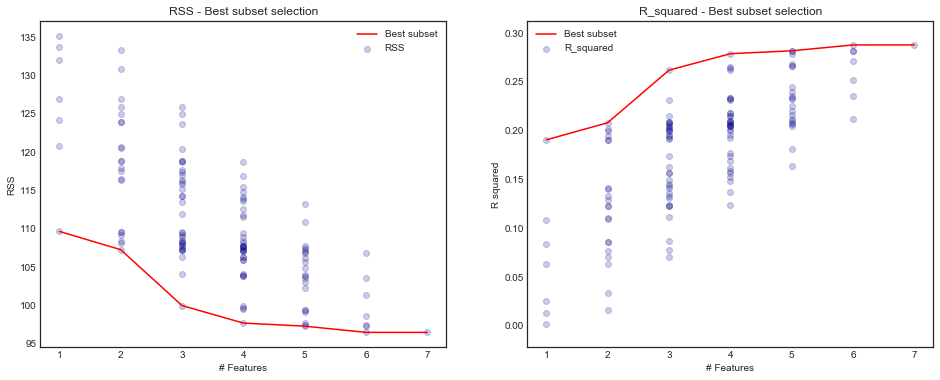

In [224]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df.numb_features,df.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection')
ax.plot(df.numb_features,df.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df.numb_features,df.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df.numb_features,df.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best subset selection')
ax.legend()

plt.show()

In [229]:
#Initializing useful variables
m = len(Y)
p = 11
df1 = df
hat_sigma_squared = (1/(m - p -1)) * min(df1['RSS'])

#Computing
df1['C_p'] = (1/m) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['AIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['BIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] +  np.log(m) * df1['numb_features'] * hat_sigma_squared )
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))
df1.head(10)

,numb_features,RSS,R_squared,features,min_RSS,max_R_squared,C_p,AIC,BIC,R_squared_adj
0,1,131.986862,0.025660,"(id,)",109.652895,0.190531,0.593290,1.303743,1.318974,0.021271
1,1,109.652895,0.190531,"(HSM,)",109.652895,0.190531,0.493585,1.084643,1.099873,0.186885
2,1,120.762225,0.108521,"(HSS,)",109.652895,0.190531,0.543180,1.193627,1.208858,0.104505
3,1,124.148703,0.083522,"(HSE,)",109.652895,0.190531,0.558298,1.226849,1.242080,0.079393
4,1,126.879855,0.063360,"(SATM,)",109.652895,0.190531,0.570491,1.253642,1.268873,0.059141
5,1,133.687134,0.013108,"(SATV,)",109.652895,0.190531,0.600881,1.320423,1.335653,0.008663
6,1,135.151886,0.002295,"(gender_w,)",109.652895,0.190531,0.607420,1.334792,1.350023,-0.002199
7,2,107.273418,0.208097,"(id, HSM)",107.273418,0.208097,0.487025,1.070228,1.100689,0.200930
8,2,118.811356,0.122923,"(id, HSS)",107.273418,0.208097,0.538534,1.183417,1.213879,0.114985
9,2,116.352415,0.141075,"(id, HSE)",107.273418,0.208097,0.527557,1.159295,1.189756,0.133302


In [227]:
df1['R_squared_adj'].idxmax()
df1['R_squared_adj'].max()

0.2681138466011379

In [242]:
df1.sort_values("C_p", ascending=False).head()

,numb_features,RSS,R_squared,features,min_RSS,max_R_squared,C_p,AIC,BIC,R_squared_adj
6,1,135.151886,0.002295,"(gender_w,)",109.652895,0.190531,0.607420,1.334792,1.350023,-0.002199
27,2,133.274045,0.016158,"(SATV, gender_w)",107.273418,0.208097,0.603100,1.325299,1.355760,0.007254
5,1,133.687134,0.013108,"(SATV,)",109.652895,0.190531,0.600881,1.320423,1.335653,0.008663
0,1,131.986862,0.025660,"(id,)",109.652895,0.190531,0.593290,1.303743,1.318974,0.021271
11,2,130.915003,0.033572,"(id, SATV)",107.273418,0.208097,0.592568,1.302156,1.332618,0.024826


>4. Plot the data for the two populations on the same graph, using different symbols (v=) and
lines. Does the relationship between valuation and selling price appear to be the same for the
two makes of tire?


In [245]:
tax = pd.read_table("http://www.stat.purdue.edu/~lingsong/teaching/2018fall/Datasets/CH08PR24.dat",
                    header=None, names=['y','x1', 'x2'],delim_whitespace=True)
tax.head()

,y,x1,x2
0,78.8,76.4,0
1,73.8,74.3,0
2,64.6,69.6,0
3,76.2,73.6,0
4,87.2,76.8,0


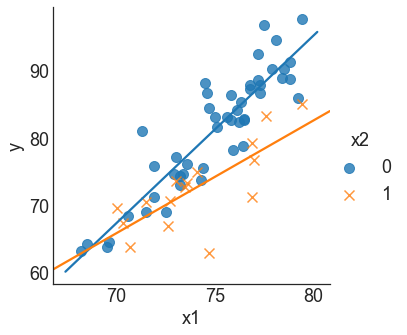

In [246]:
sns.lmplot(x ='x1', y = 'y', data = tax, hue = 'x2', 
           ci = None, markers=["o", "x"])

No the relationship is different between the to x2 categories. __In particular they have different slopes, so that the relationship between x and y is different for the  type categories__

>5. Examine the question of whether or not the two lines are the same. Write a model that allows
the two lot locations to have different intercepts and slopes. Then, perform the general linear
test to determine whether the two lines are equal. State the null and alternative hypothesis,
the test statistic with degrees of freedom, the p-value and your conclusion

            df       sum_sq      mean_sq           F        PR(>F)
x2         1.0   871.681302   871.681302   57.530098  2.507356e-10
x1         1.0  3252.370392  3252.370392  214.653206  1.752422e-21
x1:x2      1.0   112.998521   112.998521    7.457790  8.280928e-03
Residual  60.0   909.104629    15.151744         NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     93.21
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           1.48e-22
Time:                        13:25:36   Log-Likelihood:                -175.73
No. Observations:                  64   AIC:                             359.5
Df Residuals:                      60   BIC:                             368.1
Df Model:                        

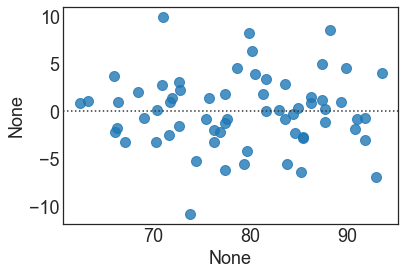

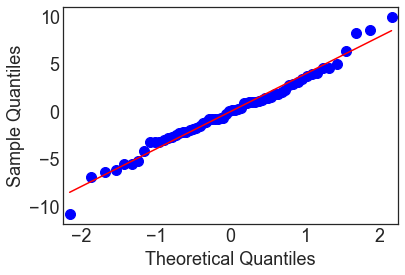

In [268]:
model = smf.ols(formula='y~x2 + x1 + x1*x2', data = tax).fit()
print(sm.stats.anova_lm(model))
print(model.summary())
sns.residplot(x = model.fittedvalues, y = model.resid);
sm.qqplot(model.resid, line='r');

For non-corner lots (lot = 0) the intercept is β0 and and the slope is β2.
For corner lots (make = 1) the intercept is β0 + β1 and the slope is β2 + β3.

- Ho: β1 = β3 = 0 (The null hypothesis is that the two lines have the same slope and intercept)
- Ha: β1 != 0 or β3 != 0 (or both) _ie.g, β1 or β3 are not both 0.

- model used: Y = β0 + β1X1 + β2X2 + β3X3 + e

- p-value = 0.008
- decision = REJECT


6. Using the model that fits two different lines, give a 94% confidence interval for the difference in slopes. (Hint: what parameter represents the difference between the slopes?)


In [248]:
print(model.summary(alpha=0.06))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     93.21
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           1.48e-22
Time:                        13:10:56   Log-Likelihood:                -175.73
No. Observations:                  64   AIC:                             359.5
Df Residuals:                      60   BIC:                             368.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|       [0.03       0.97]
------------------------------------------------------------------------------
Intercept   -126.9052     14.722     -8.620      0.0

__The differece in slope betweeen the two lines is equal to the parameter β3. The 94% CI for β3 is  beteen -1.885 and -0.330.__